<img src="scikit_learn_logo.png">

## Máquinas de Vector de Soporte

Una máquina de vector de soporte (SVM) es una de las herramientas más **versatiles** dentro del mundo del *machine learning*. Sirve tanto para resolver problemas de regresión, como problemas de regresión, linearles y no lineares. Además SVM es frecuentenemente utilizado para la **detección de outliers**.

Su aplicación más importante es probablemente la resolución de problemas de clasificación complejos con pequeñas bases de datos. 

En este capítulo vamos a centrarnos en SVM lineal para clasificación.

### SVM Lineal

Un SVM lineal trata de clasificar separando lo máximo posible los espacios que representan estas clases en el problema. 

¿Cual es la principal diferencia que existe entre la regresión logística y este?

Si nos centramos en un problema bidimensional, para que sea más sencillo de visualizar, la regresión logística se limita a encontrar una recta que separe estas regiones, sin embargo, el SVM intenta trazar un **canal**, lo **más ancho posible** que separe estas clases. Con esto se consigue separar con el mayor margen posible cada uno de los espacios.

Veamos un ejemplo mediante graficos:

In [69]:
import pandas as pd
import numpy as np
import os
#usaremos make_blobs para generar un problema linealmente separable
from sklearn.datasets import make_blobs

from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')

In [70]:
X, y = make_blobs(n_samples = 200,     # numero de muestras
                  n_features = 2,      # dimensionalidad
                  centers = 2,         # numero de clases
                  random_state = 42)   # semilla para hacerlo reproducible

In [71]:
# generamos un df con los datos
df = pd.DataFrame(np.concatenate([X, y.reshape(-1,1)], axis = 1),
                 columns = ['x', 'y', 'clase'])

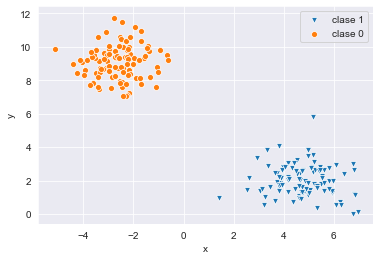

In [72]:
# mostramos los datos con seaborn
sns.scatterplot(x = 'x', y = 'y', data = df.loc[df['clase'] == 1],
                marker = 'v', label = 'clase 1')
sns.scatterplot(x = 'x', y = 'y', data = df.loc[df['clase'] == 0],
                marker = 'o', label = 'clase 0')
plt.legend();

In [73]:
# inicializamos los modelos
logistic_regression = LogisticRegression()
linear_SVC = LinearSVC()

In [74]:
# entrenamos los modelos
logistic_regression.fit(df[['x', 'y']], df['clase'])
linear_SVC.fit(df[['x', 'y']], df['clase']);

Para dibujar las rectas que separan ambas clases definidas por sus espacios, hay que seguir la siguiente fórmula:
    

$$
y  = - \frac{\theta_1 * x + \theta_0}{\theta_2}
$$    

In [75]:
# establecemos x basándonos en el propio gráfico
x = np.array([-6, 8])

# calculamos la recta asociada a la reg logística
frontera_reg_log = -(logistic_regression.coef_[0][0] * x +\
                     logistic_regression.intercept_[0]) / logistic_regression.coef_[0][1]

# calculamos la recta asociada al SVM
frontera_SVM = -(linear_SVC.coef_[0][0] * x +\
                     linear_SVC.intercept_[0]) / linear_SVC.coef_[0][1]

# calculamos los margenes superior e inferior asociados al SVM
margen = 1/linear_SVC.coef_[0][1]
zanja_superior = frontera_SVM + margen
zanja_inferior = frontera_SVM - margen


Una vez calculadas las rectas de separación, unimos los gráficos para ver la diferencia

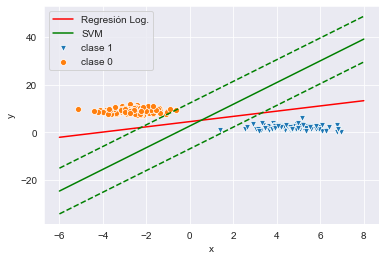

In [76]:
ax = sns.scatterplot(x = 'x', y = 'y', data = df.loc[df['clase'] == 1],
                marker = 'v', label = 'clase 1')
sns.scatterplot(x = 'x', y = 'y', data = df.loc[df['clase'] == 0],
                marker = 'o', label = 'clase 0')

sns.lineplot(x, frontera_reg_log, label = 'Regresión Log.', color = 'red')

sns.lineplot(x, frontera_SVM, label = 'SVM', color = 'green')
sns.lineplot(x, zanja_superior, color = 'green')
sns.lineplot(x, zanja_inferior, color = 'green')

ax.lines[3].set_linestyle('--')
ax.lines[2].set_linestyle('--')


plt.legend();

Podemos ver con este gráfico, que la forma en la que enfocan y resuelven el problema ambos algoritmos es completamente distinta.

La regresión logística es más propensa a sufrir **sobreajuste**, mientras que SVM lineal, al tratar de maximizar la distancia entre estos márgenes es algo más robusto, en el sentido de que generaliza algo mejor normalmente. 

¿ Quiere decir esto que siempre conviene usar SVM lineal en lugar de regresión logística ?

No. Depende del problema. Si tenemos una **base de datos muy extensa**, con **no demasiadas características** (variables explicativas/dimensiones) posiblemente la **regresión logística** sea la mejor opcion en terminos de rendimiento.

Para problemas con **pocas muestras** en la base de datos para entrenar, y con mas variables explicativas, entonces es casi seguro que elegir **SVM** sea lo correcto.

Si estuvieramos ante un problema que no pudiera resolverse con un modelo lineal, habría que usar SVM con algún **kernel** como el **polinómico** o **RBF**, de los cuales se hablará en otro capítulo.

#### Regularización
A continuación vamos a explicar uno de los parámetros más relevantes en el entrenamiento de un SVM: el **parámetro de regularización, C**. 

C es inversamente proporcional a la regularización y es **siempre positivo**. Por defecto tiene un valor = 1.

C nos permite decirle al modelo cuánto queremos evitar clasificar erróneamente cada muestra. Esto se traduce en que si establecemos un valor alto, el modelo tratará de escoger un plano o hiperplano con margen más pequeño. 

Si escogemos un C bajo, los márgenes aumentaran, aunque se clasifiquen erroneamente más puntos.
    
Vamos a graficar este concepto:

In [117]:
X, y = make_blobs(n_samples = 200,     # numero de muestras
                  n_features = 2,      # dimensionalidad
                  centers = 2,
                  cluster_std = 2,
                  random_state = 42)   # semilla para hacerlo reproducible

In [118]:
# generamos un df con los datos
df = pd.DataFrame(np.concatenate([X, y.reshape(-1,1)], axis = 1),
                 columns = ['x', 'y', 'clase'])

In [135]:
# inicializamos los modelos
linear_SVC_1 = LinearSVC(C = 1e-3)
linear_SVC_100 = LinearSVC(C = 3)

In [136]:
# entrenamos los modelos
linear_SVC_1.fit(df[['x', 'y']], df['clase']);
linear_SVC_100.fit(df[['x', 'y']], df['clase']);

In [137]:
# establecemos x basándonos en el propio gráfico
x = np.array([-6, 8])

# calculamos la recta asociada al SVM
frontera_SVM_1 = -(linear_SVC_1.coef_[0][0] * x +\
                     linear_SVC_1.intercept_[0]) / linear_SVC_1.coef_[0][1]

# calculamos los margenes superior e inferior asociados al SVM
margen_1 = 1/linear_SVC_1.coef_[0][1]
zanja_superior_1 = frontera_SVM_1 + margen_1
zanja_inferior_1 = frontera_SVM_1 - margen_1

# calculamos la recta asociada al SVM
frontera_SVM_100 = -(linear_SVC_100.coef_[0][0] * x +\
                     linear_SVC_100.intercept_[0]) / linear_SVC_100.coef_[0][1]

# calculamos los margenes superior e inferior asociados al SVM
margen_100 = 1/linear_SVC_100.coef_[0][1]
zanja_superior_100 = frontera_SVM_100 + margen_100
zanja_inferior_100 = frontera_SVM_100- margen_100




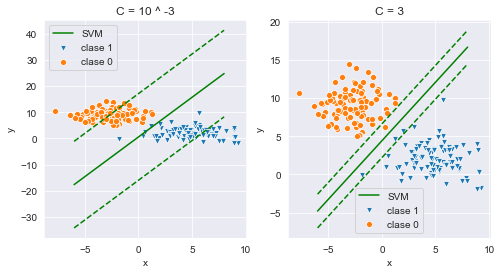

In [138]:
figure, ax = plt.subplots(1,2, figsize = (8,4))

#ax[0]
sns.scatterplot(x = 'x', y = 'y', data = df.loc[df['clase'] == 1],
                marker = 'v', label = 'clase 1', ax = ax[0])
sns.scatterplot(x = 'x', y = 'y', data = df.loc[df['clase'] == 0],
                marker = 'o', label = 'clase 0', ax = ax[0])

sns.lineplot(x, frontera_SVM_1, label = 'SVM', color = 'green', ax = ax[0])
sns.lineplot(x, zanja_superior_1, color = 'green', ax = ax[0])
sns.lineplot(x, zanja_inferior_1, color = 'green', ax = ax[0])

ax[0].lines[1].set_linestyle('--')
ax[0].lines[2].set_linestyle('--')


# ax[1]
sns.scatterplot(x = 'x', y = 'y', data = df.loc[df['clase'] == 1],
                marker = 'v', label = 'clase 1', ax = ax[1])
sns.scatterplot(x = 'x', y = 'y', data = df.loc[df['clase'] == 0],
                marker = 'o', label = 'clase 0', ax = ax[1])


sns.lineplot(x, frontera_SVM_100, label = 'SVM', color = 'green', ax = ax[1])
sns.lineplot(x, zanja_superior_100, color = 'green', ax = ax[1])
sns.lineplot(x, zanja_inferior_100, color = 'green', ax = ax[1])

ax[1].lines[1].set_linestyle('--')
ax[1].lines[2].set_linestyle('--')

# Titulos
ax[0].set_title('C = 10 ^ -3')
ax[1].set_title('C = 3');

Un C demasiado bajo, como es el caso de la gráfica izquierda, da lugar a un **modelo sobresimplificado**, en el cual muchas instancias se encuentran dentro del canal, incluso algunas en el plano de la clase contraria. Caracterizado por **error de tipo bias**.

Un C demasiado **alto**, al querer **reducir al máximo posible el número de muestras dentro del canal**, tenemos un canal muy estrecho y que va a variar mucho con los **valores atípicos**. Es decir, va a estar influenciado por error de **varianza**. En este caso ademas, si se es demasiado estricto, el modelo **puede no converger**, ya que se le exige que no existan violaciones en las fronteras que dibuja, pero a lo mejor esto es imposible conseguirlo al menos de manera lineal.

Lo ideal es encontrar un **equilibrio** entre el número de muestras que se encuentren dentro del canal y, la anchura del mismo.

#### Escalado
Algo a tener muy en cuenta a la hora de escoger este algoritmo es que su rendimiento se puede ver bastante mermado si las **escalas** de las variables explicativas son muy **diferentes**.

Para verlo, vamos a utilizar de nuevo una base de datos generada pero esta vez con algo más de dispersión para ponerselo más complicado al modelo. Veremos su rendimiento con la matriz de confusión. Posteriormente repetiremos el proceso, pero esta vez, **multiplicaremos una de las dimensiones * 200** para ver la diferencia de resultados 

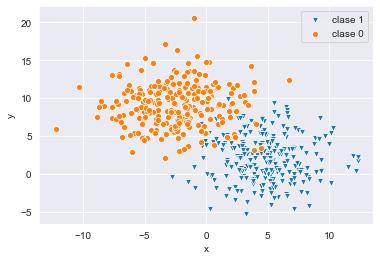

In [27]:
# generamos los datos
X, y = make_blobs(n_samples = 500,
                 n_features = 2,
                 centers = 2,
                 cluster_std = 3,    # desviación estandar para complicar 
                 random_state = 42)  # la clasificación
# generamos el df
df = pd.DataFrame(np.concatenate([X, y.reshape(-1,1)], axis = 1),
                 columns = ['x', 'y', 'clase'])

# visualizamos los datos
sns.scatterplot(x = 'x', y = 'y', data = df.loc[df['clase'] == 1],
                marker = 'v', label = 'clase 1')
sns.scatterplot(x = 'x', y = 'y', data = df.loc[df['clase'] == 0],
                marker = 'o', label = 'clase 0')
plt.legend();    


In [28]:
# separamos train y test
X_train, X_test, y_train, y_test = train_test_split(df[['x','y']], df['clase'],\
                                                   random_state = 42,\
                                                   test_size = 0.3)

In [33]:
# inicializamos el modelo y lo entrenamos
linearSVM_1 = LinearSVC(C = 0.2);
linearSVM_1.fit(X_train, y_train);

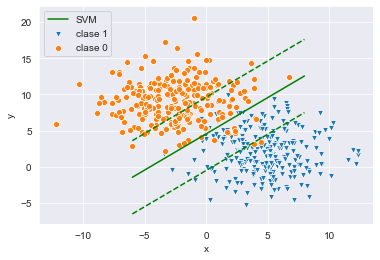

In [41]:
x = np.array([-6, 8])

# calculamos la recta asociada al SVM
frontera_SVM = -(linearSVM_1.coef_[0][0] * x +\
                     linearSVM_1.intercept_[0]) / linearSVM_1.coef_[0][1]

# calculamos los margenes superior e inferior asociados al SVM
margen = 1/linearSVM_1.coef_[0][1]
zanja_superior = frontera_SVM + margen
zanja_inferior = frontera_SVM - margen

ax = sns.scatterplot(x = 'x', y = 'y', data = df.loc[df['clase'] == 1],
                marker = 'v', label = 'clase 1')
sns.scatterplot(x = 'x', y = 'y', data = df.loc[df['clase'] == 0],
                marker = 'o', label = 'clase 0')

sns.lineplot(x, frontera_SVM, label = 'SVM', color = 'green')
sns.lineplot(x, zanja_superior, color = 'green')
sns.lineplot(x, zanja_inferior, color = 'green')

ax.lines[1].set_linestyle('--')
ax.lines[2].set_linestyle('--')


plt.legend();


In [42]:
predicciones_1 = linearSVM_1.predict(X_test)

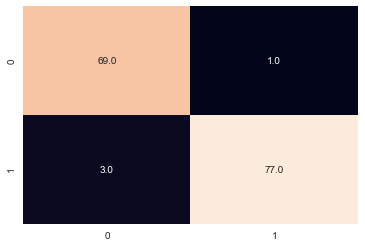

In [43]:
matriz_confu_1 = confusion_matrix(y_true = y_test,
                                 y_pred = predicciones_1,
                                 )

sns.heatmap(matriz_confu_1, annot = True, fmt = '.1f', cbar = False);

El modelo clasifica bastante bien en esta prueba, solo ha cometido **4 errores**, ahora reescalamos la dimensión **x** y repetimos el proceso:

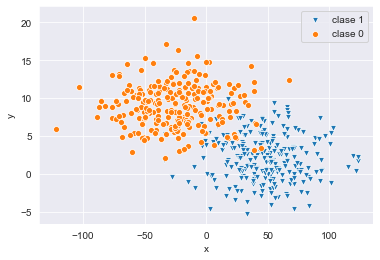

In [58]:
# generamos el df
df_reescalado = df.copy()
df_reescalado['x'] = df_reescalado['x'] * 10

# visualizamos los datos
sns.scatterplot(x = 'x', y = 'y', data = df_reescalado.loc[df_reescalado['clase'] == 1],
                marker = 'v', label = 'clase 1')
sns.scatterplot(x = 'x', y = 'y', data = df_reescalado.loc[df_reescalado['clase'] == 0],
                marker = 'o', label = 'clase 0')
plt.legend();    


In [59]:
# separamos train y test
X_train, X_test, y_train, y_test = train_test_split(df_reescalado[['x','y']],\
                                                    df_reescalado['clase'],\
                                                    random_state = 42,\
                                                    test_size = 0.3)

In [60]:
# inicializamos el modelo y lo entrenamos
linearSVM_2 = LinearSVC(C = 0.2);
linearSVM_2.fit(X_train, y_train);

C:\Users\Nacho\Anaconda3\envs\TensorFlow\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Como se comentaba en el apartado anterior, puede ocurrir que si exigimos cierta restricción con el valor C, el modelo lineal pueda ser inviable. En este caso no tenemos más remedio que **reducir el valor C**.

Si tuviesemos que especificar un valor de C muy bajo, seguramente sea por que el problema no deba resolverse con un modelo lineal y deberíamos pensar en usar **otra solución**.

In [64]:
linearSVM_2 = LinearSVC(C = 1e-3);
linearSVM_2.fit(X_train, y_train);

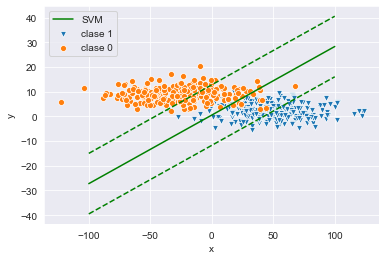

In [65]:
x = np.array([-100, 100])

# calculamos la recta asociada al SVM
frontera_SVM = -(linearSVM_2.coef_[0][0] * x +\
                     linearSVM_2.intercept_[0]) / linearSVM_2.coef_[0][1]

# calculamos los margenes superior e inferior asociados al SVM
margen = 1/linearSVM_2.coef_[0][1]
zanja_superior = frontera_SVM + margen
zanja_inferior = frontera_SVM - margen

ax = sns.scatterplot(x = 'x', y = 'y', data = df_reescalado.loc[df_reescalado['clase'] == 1],
                marker = 'v', label = 'clase 1')
sns.scatterplot(x = 'x', y = 'y', data = df_reescalado.loc[df_reescalado['clase'] == 0],
                marker = 'o', label = 'clase 0')

sns.lineplot(x, frontera_SVM, label = 'SVM', color = 'green')
sns.lineplot(x, zanja_superior, color = 'green')
sns.lineplot(x, zanja_inferior, color = 'green')

ax.lines[1].set_linestyle('--')
ax.lines[2].set_linestyle('--')


plt.legend();


In [66]:
predicciones_2 = linearSVM_2.predict(X_test)

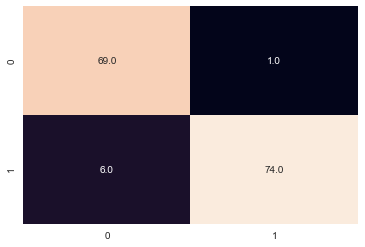

In [67]:
matriz_confu_2 = confusion_matrix(y_true = y_test,
                                 y_pred = predicciones_2,
                                 )

sns.heatmap(matriz_confu_2, annot = True, fmt = '.1f', cbar = False);

Hemos podido comprobar como trabajar con variables de diferentes escalas tiene un efecto brutal en este tipo de algoritmos.

No solo hemos tenido que reducir de manera drástica nuestro valor de regularización, si no que luego en el resultado final hemos cometido **practicamente el doble de errores**.

Como conclusión, siempre que trabajemos con este algoritmo, tenemos que asegurarnos de escalar todas las variables. Para ello se recomienda utilizar alguna función dentro del módulo **preprocessing** de scikit learn:
- StandardScaler
- MinMaxScaler